**TASK: IRIS FLOWER CLASSIFICATION**

**Name:** Olawumi Leah Titilayo
    
**Batch:** June batch A55

**Aim:** To use Iris dataset to develop a model that can classify Iris flowers into different species based on their sepal and petal measurements.

**Objective:** To train a machine learning model that can learn the measurements and and accurately classify thr iris flowers into their respective species.

This dataset consist of three species: Setosa,Versicolor, and virginica.This species can be differentiate base on their measurements.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('IRIS.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display the summary statistics of the dataframe
print(df.describe())

# Display the information about the dataframe
print(df.info())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [2]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Let's check for the unique data in the target variable(species)

In [3]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#count the occurence of each species

species_count = df['species'].value_counts()
species_count

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

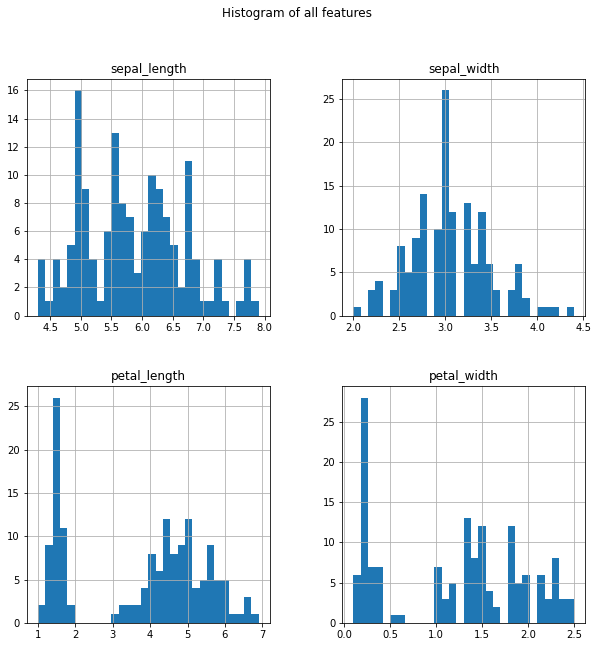

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(figsize=(10,10), bins = 30)
plt.suptitle('Histogram of all features')

plt.show()

To build a model that predicts that can classify iris flower into different species based on their sepal and petal measurement, we will follow these steps:

1. **Data Preprocessing:** Encode categorical variables, and scale numerical features.
2. **Model Building:** Use a machine learning algorithm to build the model.
3. **Model Evaluation:** Evaluate the model's performance using appropriate metrics.
Let's start with data preprocessing.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# Define features and target variable
X = df.drop(columns = ['species'])
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Data preprocessing completed.')


Data preprocessing completed.


In [9]:
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [10]:
df.tail(20)

,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,2
131,7.9,3.8,6.4,2.0,2
132,6.4,2.8,5.6,2.2,2
133,6.3,2.8,5.1,1.5,2
134,6.1,2.6,5.6,1.4,2
135,7.7,3.0,6.1,2.3,2
136,6.3,3.4,5.6,2.4,2
137,6.4,3.1,5.5,1.8,2
138,6.0,3.0,4.8,1.8,2
139,6.9,3.1,5.4,2.1,2


Data preprocessing is completed. Now, let's build a machine learning model to predict whether a passenger survived or not. We'll use a KNeighborsClassifer for this task.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

k_values = [i for i in range(1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

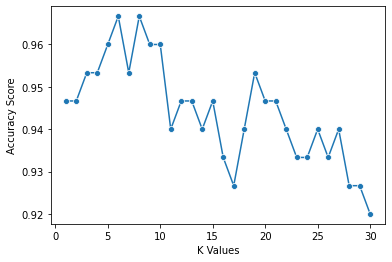

In [12]:
sns.lineplot(x = k_values, y= scores, marker = 'o')
plt.xlabel('K Values')
plt.ylabel('Accuracy Score')

In [13]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [14]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
#precision = precision_score(y_test,y_pred)
#recall = recall_score(y_test, y_pred)

print('Accuracy', accuracy)
#('Precision', precision)
#print('Recall', recall)

Accuracy 0.9333333333333333


**Summary:**
**Model Accuracy:** The model achieved an accuracy of approximately 93.33%.

# Logistic Regression Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

#creating a logistic regression model
model = LogisticRegression()

#Train the model on the training data
model.fit(X_train,y_train)

LogisticRegression()

In [16]:
#prediction on the testing dats
predictions = model.predict(X_test)

#Evaluating model prformance
print(classification_report(y_test, predictions))
print('Accuracy:',accuracy_score(y_test, predictions))

#compute comfusion matrix for the test data
print('Confusion matrix:', confusion_matrix(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Accuracy: 0.9333333333333333
Confusion matrix: [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


**Summary:**
    **Iris Setosa:** perform well across precision,recall anf F1-score showing the class with 100% accuracy. **Iris versicolor:** has 90% precision and 90% recall which mean it miss a few sample when prediction. **Iris versicolor:** sample and miss some identifies instance. Iris virginica: show strong performance with 90% precision and recall respectively which mean it miss some prediction and identifiers.
    
 **Accuracy:** The overall accuracy is 93.33%
 **Confusion Matrix:** 
    Iris Setosa: All 10 instances are correctly classifiied,Iris versicolor: 9 instance are correctly classified out of 10.Iris virginica:9 instance are correctly classified out of 10.
    


In [17]:
#check whch predictions are correct
correct_prediction = y_pred==y_test

#Extracting the data points that were correctly predicted
accurately_predicted_data = pd.DataFrame({'Actual': y_test, 'Correct': correct_prediction})
accurately_predicted_data = accurately_predicted_data[accurately_predicted_data['Correct'] == True]

#Display the accurately predicted data
print(accurately_predicted_data)

     Actual  Correct
38        0     True
127       2     True
57        1     True
93        1     True
42        0     True
56        1     True
22        0     True
20        0     True
147       2     True
84        1     True
107       2     True
141       2     True
104       2     True
51        1     True
7         0     True
49        0     True
14        0     True
69        1     True
63        1     True
10        0     True
140       2     True
58        1     True
132       2     True
77        1     True
75        1     True
18        0     True
116       2     True
28        0     True


In [18]:
# Define some sample values for prediction
sample_values = pd.DataFrame({
    'sepal_length': [6.4],
    'sepal_width': [2.8],
    'petal_length': [5.6],
    'petal_width': [2.2]
})

# Make predictions using the model
predictions = knn.predict(sample_values)

# Print the predictions
print('Predictions for sample values:')
print(predictions)

Predictions for sample values:
[2]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Prediction sample was picked from dataset number 132,the prediction value is 2, which is the same with the original data.